# GP04 GeoPandas
GeoPandas Full Documentation: https://geopandas.org/en/stable/docs.html

Spatial Reference: https://spatialreference.org/
___
## 6. Spatial Join
* Merging of latitude and longtitude data
* Table Join (Pandas operation) vs. Spatial Join (Geographic Operation)

In [33]:
# Library import + Data Load
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
c = gpd.read_file('localdata/countries.shp')
c.head(3)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [4]:
# CRS check for countries data
c.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
# Load data for the taken place conflicts
con = gpd.read_file("localdata/acled2019.shp", rows=500)
con.head(3)

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)


In [5]:
# CRS check for conflicts data
con.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Table Join: **.merge()**
* Combining two tables based on the common column NAME (table attribute).
* A Pandas operation

In [6]:
# Create a table (GeoDataFrame) to hold information in geometry and abbreviated names 
cs = c[['geometry', 'NAME']]
cs.head()

,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru


In [8]:
# Create a table (non-GeoDataFrame) to hold information in country names and population estimate
cn = c[['NAME', 'POP_EST']]
cn.head()

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992
2,Chile,17789267
3,Bolivia,11138234
4,Peru,31036656


In [11]:
# Merge the above two tables based on the common column name.
# Link table 1 (right) to table 2 (left)
m1 = cs.merge(cn, on='NAME', how='left')
m1.head()

,geometry,NAME,POP_EST
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,260580739
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,31381992
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,17789267
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,11138234
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,31036656


In [12]:
# Check the data type of the newly merged table --> Geodataframe
type(m1)

geopandas.geodataframe.GeoDataFrame

In [13]:
# Merge the above two tables (sweapped position) based on ISO_A3 Column. 
m2 = cn.merge(cs, on='NAME', how='left')
m2.head()

,NAME,POP_EST,geometry
0,Indonesia,260580739,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [14]:
# Check the data type of the newly merged table --> Pandas dataframe
type(m2)

pandas.core.frame.DataFrame

#### Spatial Join: **.sjoin()**
* Combining two tables based on LOCATIONS (geographic attribute).
* A GeoPandas operation
* 'inner'/'left'/'right' (for the parameter, how=)
* 'within'/'contains'/'intersects'/'touches'/'crosses'/'overlaps' (for the parameter, predicate=)

In [17]:
# Recap
cs.head()

,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru


In [20]:
# Create a table (GeoDataFrame) based on the conflicts data to filter out the non-required information.
congeo = con[['event_id_c', 'event_date','fatalities', 'geometry']]
congeo.head()

,event_id_c,event_date,fatalities,geometry
0,YEM45982,31 December 2019,0,POINT (47.07650 14.35410)
1,YEM45983,31 December 2019,0,POINT (47.07650 14.35410)
2,YEM45984,31 December 2019,1,POINT (47.15700 14.20810)
3,IND68948,31 December 2019,0,POINT (85.83380 20.27240)
4,SLV861,31 December 2019,1,POINT (-89.23830 13.58940)


In [21]:
# Datatype check --> Geodataframe
type(congeo)

geopandas.geodataframe.GeoDataFrame

In [23]:
# Merge the conflicts data (congeo) with the table (cs) of country names and population.
# Each conflict point matches with its corresponding country based on its location.
m3 = gpd.sjoin(congeo, cs, how="inner", predicate='within')
m3.sample(10)

,event_id_c,event_date,fatalities,geometry,index_right,NAME
445,SOM30202,30 December 2019,0,POINT (45.49680 2.78090),15,Somalia
108,AZE12783,31 December 2019,0,POINT (47.30880 39.57280),64,Azerbaijan
299,AFG42750,31 December 2019,0,POINT (64.57000 31.82090),129,Afghanistan
378,UKR31054,31 December 2019,0,POINT (37.81100 47.17450),34,Ukraine
20,BRA10732,31 December 2019,2,POINT (-60.02500 -3.10190),45,Brazil
55,UKR31031,31 December 2019,0,POINT (38.00940 48.42920),34,Ukraine
399,BRA10708,30 December 2019,0,POINT (-43.39940 -22.76420),45,Brazil
13,ARM3353,31 December 2019,0,POINT (45.57610 40.85520),70,Armenia
411,VEN3388,30 December 2019,0,POINT (-62.71910 8.29500),158,Venezuela
210,NIG15964,31 December 2019,0,POINT (12.81670 11.53330),100,Nigeria


___
## 7. Buffer Analysis
* Point analysis: Measurement of proximity distance.
* Widely in many domains to obtain a distance around a point/Line/Polygon.
* IMPORTANT: The CRS/projection type dictates the output. The display units used in an output has to be the same as the projecting data such as whether the desired distances are in degrees or metres.
* The CRS information (including the units type) used in this module: http://spatialreference.org/ref/epsg/sweref99-tm/
* To return the feature centre (the centre point in polygon): **.centroid**
* Calculation of a circle area (buffer) around a point: **.buffer()**

In [93]:
# Obtain the centroids of Polygon for all countries
# Note: Inaccurate. Need to project .to_crs(epsg=3006) later
cen = c.geometry.centroid
cen.head()

C:\Users\likre\AppData\Local\Temp\ipykernel_96468\1202888868.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cen = c.geometry.centroid


0     POINT (117.27043 -2.22296)
1      POINT (109.69887 3.79239)
2    POINT (-71.36437 -37.74361)
3    POINT (-64.68475 -16.70688)
4     POINT (-74.37806 -9.15439)
dtype: geometry

<Axes: >

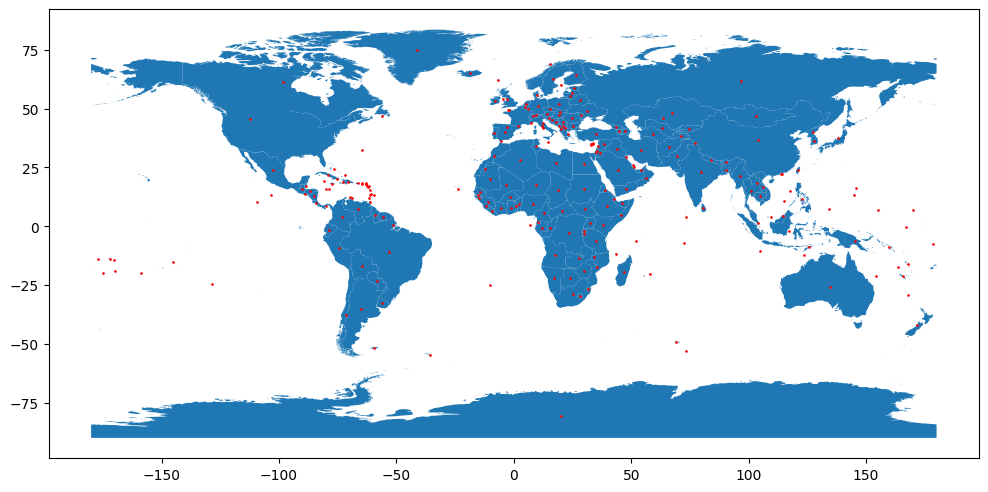

In [94]:
# Shows centre points for all countries
fig, ax = plt.subplots(figsize=(12,10))
c.plot(ax=ax)
cen.plot(ax=ax, color='red', markersize=0.8) 

In [95]:
# Subset data to obtain the country of interest
sw = c[c["NAME"] == "Sweden"]

In [96]:
# CRS check for Sweden
# Notice the measurement units are in degrees
sw.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [97]:
# Create a centre point for only Sweden
# Incorrect projection (measurement unit: degrees)
swcen = sw.geometry.centroid
swcen.head()

C:\Users\likre\AppData\Local\Temp\ipykernel_96468\1230661067.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  swcen = sw.geometry.centroid


54    POINT (16.75447 62.77710)
dtype: geometry

<Axes: >

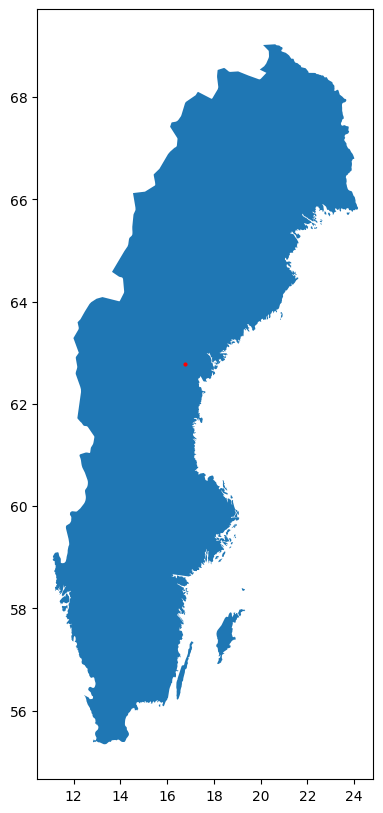

In [98]:
# Quick plot to see the centre point of Sweden
fig, ax = plt.subplots(figsize=(12,10))
sw.plot(ax=ax)
swcen.plot(ax=ax, color='red', markersize=4) 

In [99]:
# Projection to the correct CRS --> EPSG:3006 (with metre units)
# SAME AS sw = sw.to_crs(epsg=3006)
swcp = swcen.to_crs('epsg:3006')
sw = sw.to_crs('epsg:3006')
swcp.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

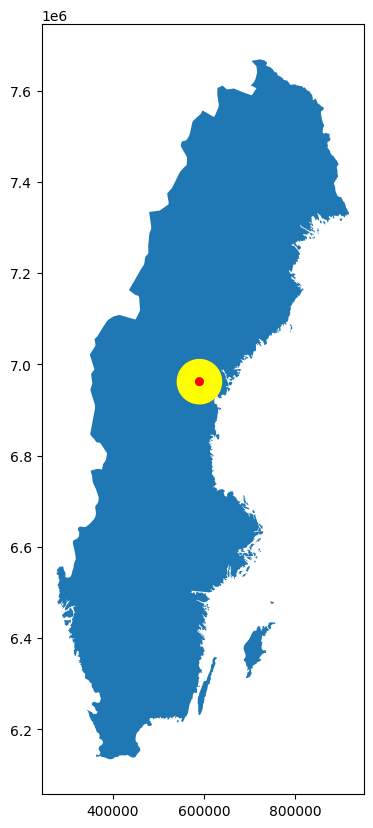

In [103]:
# Create and plot a buffer of 10 & 50 km
s10 = swcp.buffer(10000)
s50 = swcp.buffer(50000)

fig, ax = plt.subplots(figsize=(12,10))
sw.plot(ax=ax)
s50.plot(ax=ax, color='yellow')
s10.plot(ax=ax, color='red')

plt.show()

___